<a href="https://colab.research.google.com/github/madhan2707/ML-with-flask/blob/main/adinsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import All Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


Load the CSV File

In [3]:
file_path = "/content/Claimants_Data.csv"  # Update path if needed
df = pd.read_csv(file_path)
print("Dataset Loaded Successfully!")


Dataset Loaded Successfully!


In [4]:
df.shape


(100156, 13)

Check for NULL Values

In [ ]:
print("Missing values in each column:\n", df.isnull().sum())



Missing values in each column:
 CASENUM                   0
ATTORNEY                  0
CLMSEX                    0
CLMINSUR                  0
SEATBELT                  0
CLMAGE                    0
LOSS                      0
Accident_Severity         0
Claim_Amount_Requested    0
Claim_Approval_Status     0
Settlement_Amount         0
Policy_Type               0
Driving_Record            0
dtype: int64


handling null values


In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)  # Fill categorical missing values with mode
print("Missing Values Handled!")


Missing Values Handled!


here we removing the rows where Age is 0 years

In [5]:
df["CLMAGE"].replace(0,df[df["CLMAGE"]>0]["CLMAGE"].median(),inplace=True)

<ipython-input-5-d6136c572a84>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CLMAGE"].replace(0,df[df["CLMAGE"]>0]["CLMAGE"].median(),inplace=True)


In [7]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,1,1,1.0,1.0,0.0,48,8502.60,Moderate,13062.60,1,10398.38,Comprehensive,Minor Offenses
1,2,0,1.0,0.0,1.0,19,2464.30,Moderate,4249.17,1,16550.01,Comprehensive,Clean
2,3,1,0.0,0.0,1.0,69,15647.05,Severe,7401.16,0,18019.31,Third-Party,Minor Offenses
3,4,1,0.0,0.0,1.0,34,9309.79,Moderate,1034.25,0,6826.58,Comprehensive,Minor Offenses
4,5,1,1.0,1.0,0.0,2,663.94,Severe,12654.29,0,18463.96,Third-Party,Minor Offenses


In [8]:
df.groupby('ATTORNEY')['SEATBELT'].sum()

,SEATBELT
ATTORNEY,
0,24889.0
1,24921.0


In [9]:
df.groupby('Policy_Type')['ATTORNEY'].sum()

,ATTORNEY
Policy_Type,
Comprehensive,25353
Third-Party,24762


In [10]:
df.groupby("Accident_Severity")["ATTORNEY"].sum()

,ATTORNEY
Accident_Severity,
Minor,16536
Moderate,16781
Severe,16798


Here we need to Label encode the Accident, policy_Type and Driving Records


In [11]:
label=LabelEncoder()
df['Accident_Severity']=label.fit_transform(df['Accident_Severity'])
df['Driving_Record']=label.fit_transform(df['Driving_Record'])
df['Policy_Type']=label.fit_transform(df['Policy_Type'])
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,1,1,1.0,1.0,0.0,48,8502.60,1,13062.60,1,10398.38,0,2
1,2,0,1.0,0.0,1.0,19,2464.30,1,4249.17,1,16550.01,0,0
2,3,1,0.0,0.0,1.0,69,15647.05,2,7401.16,0,18019.31,1,2
3,4,1,0.0,0.0,1.0,34,9309.79,1,1034.25,0,6826.58,0,2
4,5,1,1.0,1.0,0.0,2,663.94,2,12654.29,0,18463.96,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100151,100152,0,1.0,1.0,1.0,88,4998.43,2,10673.92,1,8921.29,0,2
100152,100153,0,1.0,1.0,1.0,89,9925.55,1,6345.22,1,18418.60,1,0
100153,100154,1,0.0,1.0,1.0,4,8314.99,2,9233.50,1,10453.20,1,1
100154,100155,0,0.0,0.0,0.0,50,3302.68,1,1489.38,1,1825.65,1,2


Here we Scaling The Data

In [12]:
scaler = StandardScaler()

In [13]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Claim_Amount_Requested', 'Settlement_Amount', 'LOSS']

scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df.head())


   CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0        1         1     1.0       1.0       0.0      48  0.529482   
1        2         0     1.0       0.0       1.0      19  0.139871   
2        3         1     0.0       0.0       1.0      69  0.990467   
3        4         1     0.0       0.0       1.0      34  0.581565   
4        5         1     1.0       1.0       0.0       2  0.023705   

   Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0                  1                0.643465                      1   
1                  1                0.189755                      1   
2                  2                0.352017                      0   
3                  1                0.024252                      0   
4                  2                0.622445                      0   

   Settlement_Amount  Policy_Type  Driving_Record  
0           0.521047            0               2  
1           0.842417            0               

 Encoding Categorical Variables (Label Encoding)


In [14]:
Q1 = df['Settlement_Amount'].quantile(0.25)
Q3 = df['Settlement_Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers2 = df[(df['Settlement_Amount'] < lower_bound)]
outliers2

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [15]:
Q1 = df['Claim_Amount_Requested'].quantile(0.25)
Q3 = df['Claim_Amount_Requested'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Claim_Amount_Requested'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [16]:
Q1 = df['CLMAGE'].quantile(0.25)
Q3 = df['CLMAGE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['CLMAGE'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [17]:
Q1 = df['LOSS'].quantile(0.25)
Q3 = df['LOSS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['LOSS'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


Here we converted from String to numbers And we need To Find outliers in Claim_Amount_Requested

In [ ]:
categorical_columns = df.select_dtypes(include=["object"]).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for later use

print("Categorical Variables Encoded Successfully!")


Categorical Variables Encoded Successfully!


Standardization (Feature Scaling)

In [ ]:
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Data Standardized Successfully!")


Data Standardized Successfully!


Feature Engineering

In [ ]:
# Example: Creating a new feature (Claim to Loss Ratio)
df["Claim_Loss_Ratio"] = df["Claim_Amount_Requested"] / (df["LOSS"] + 1)


In [ ]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record,Claim_Loss_Ratio
0,-1.732034,0.999261,1.002459,1.001159,-0.994663,-1.714248,0.103870,-0.002754,0.501756,1.002179,0.075005,-0.993849,1.215003,0.454543
1,-1.731999,-1.000739,1.002459,-0.998842,1.005366,-1.020862,-1.245499,-0.002754,-1.071469,1.002179,1.187638,-0.993849,-1.235062,4.364450
2,-1.731964,0.999261,-0.997547,-0.998842,1.005366,0.803838,1.700429,1.223131,-0.508829,-0.997826,1.453387,1.006190,1.215003,-0.188425
3,-1.731930,0.999261,-0.997547,-0.998842,1.005366,-0.473452,0.284251,-0.002754,-1.645343,-0.997826,-0.571018,-0.993849,1.215003,-1.281169
4,-1.731895,0.999261,1.002459,1.001159,-0.994663,-1.641260,-1.647823,1.223131,0.428871,-0.997826,1.533810,1.006190,1.215003,-0.662020


In [25]:
df.columns

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS', 'Accident_Severity', 'Claim_Amount_Requested',
       'Claim_Approval_Status', 'Settlement_Amount', 'Policy_Type',
       'Driving_Record'],
      dtype='object')

Data Visualization

Scatter Plots

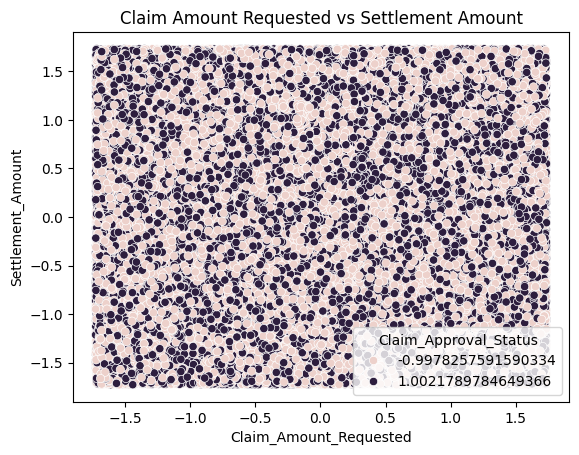

In [ ]:
sns.scatterplot(x=df["Claim_Amount_Requested"], y=df["Settlement_Amount"], hue=df["Claim_Approval_Status"])
plt.title("Claim Amount Requested vs Settlement Amount")
plt.show()


pair plots

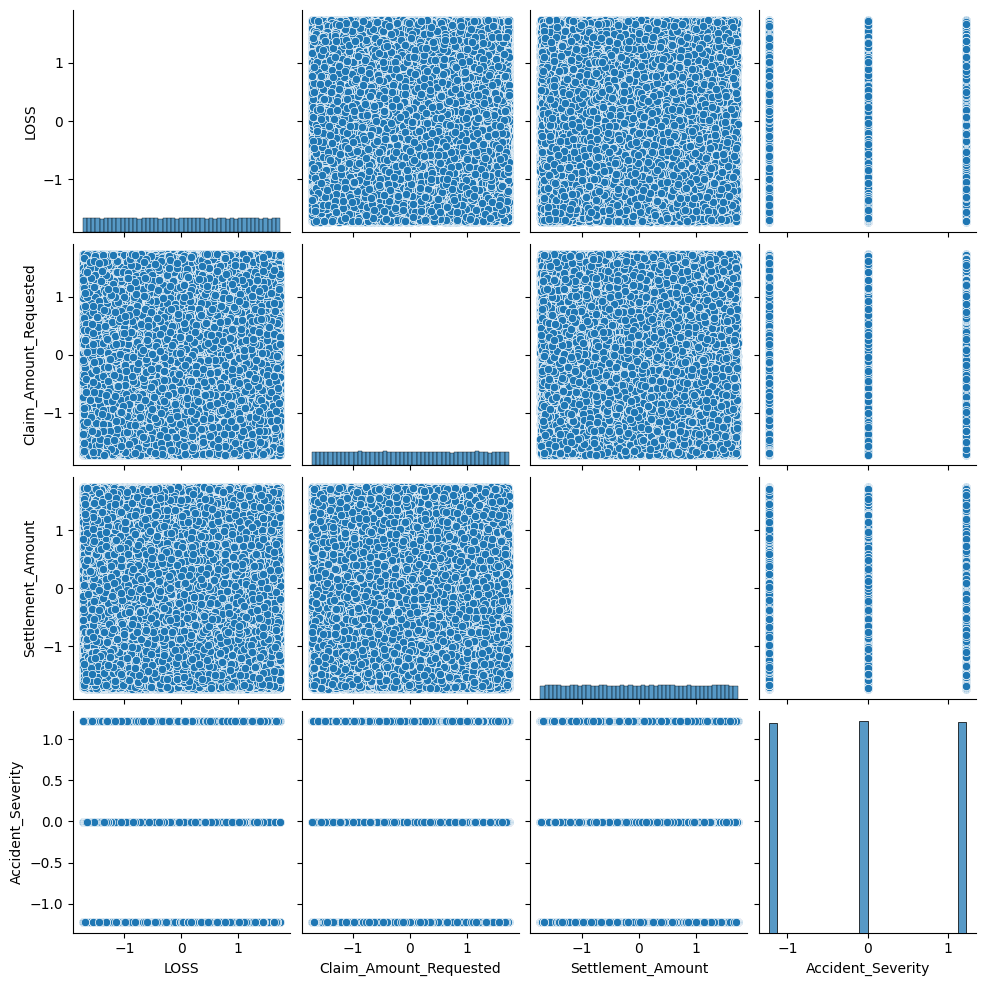

In [ ]:
sns.pairplot(df[["LOSS", "Claim_Amount_Requested", "Settlement_Amount", "Accident_Severity"]])
plt.show()


Histograms

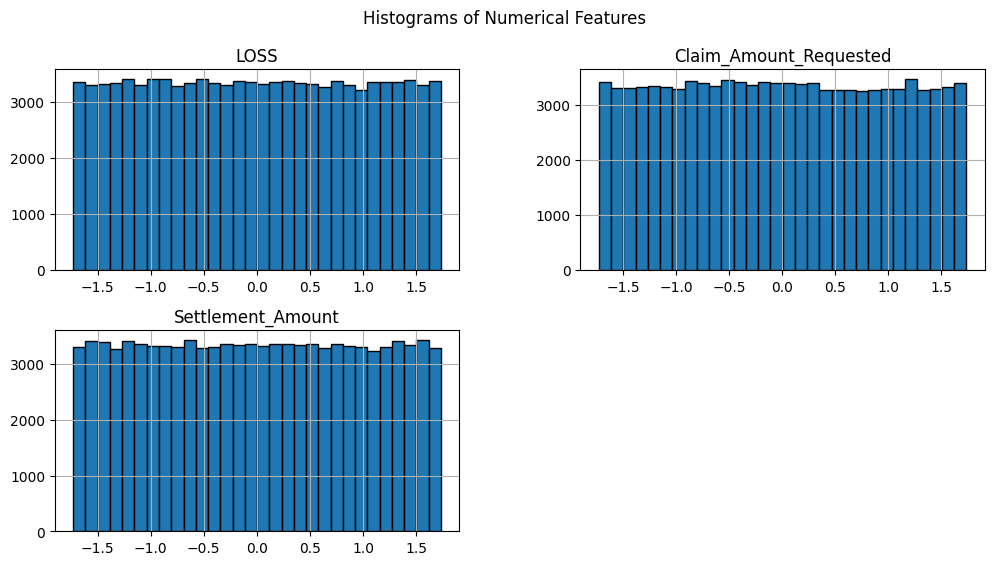

In [ ]:
df[["LOSS", "Claim_Amount_Requested", "Settlement_Amount"]].hist(figsize=(12, 6), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()


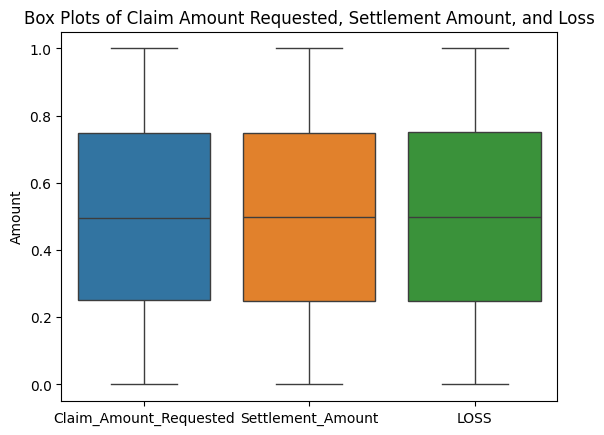

In [18]:
sns.boxplot(data=df[['Claim_Amount_Requested', 'Settlement_Amount', 'LOSS']])
plt.title('Box Plots of Claim Amount Requested, Settlement Amount, and Loss')
plt.ylabel('Amount')
plt.show()

Here we Don't have any outliers here
To Find corealation we are using heatmap

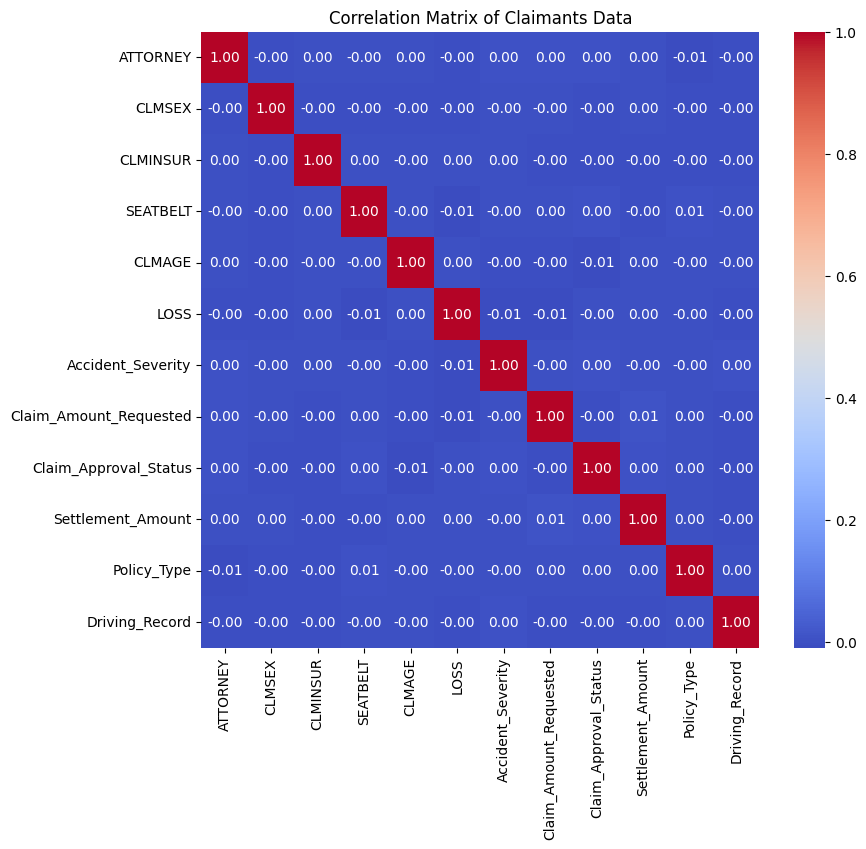

In [19]:
DATA = df.drop('CASENUM',axis=1)
plt.figure(figsize=(9, 8))
sns.heatmap(DATA.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Claimants Data')
plt.show()

Train-Test Splits

In [ ]:

X = df.drop(columns=["Claim_Approval_Status", "Settlement_Amount"])
y_classification = df["Claim_Approval_Status"]
y_regression = df["Settlement_Amount"]

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)


Model Implementation

Classification Models (Optimized for Accuracy & F1 Score)

In [ ]:
best_classification_models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "SVC": SVC(kernel="rbf", C=1.0, probability=True)
}


best_classification_results = {}

for name, model in best_classification_models.items():

    y_train_class_encoded = y_train_class.astype(int)
    y_test_class_encoded = y_test_class.astype(int)

    model.fit(X_train_class, y_train_class_encoded)
    y_pred = model.predict(X_test_class)


    accuracy = accuracy_score(y_test_class_encoded, y_pred)
    f1 = f1_score(y_test_class_encoded, y_pred, average="weighted")
    best_classification_results[name] = {"Accuracy": accuracy, "F1 Score": f1}

print("Classification Results:\n", best_classification_results)

Classification Results:
 {'Random Forest': {'Accuracy': 0.500848642172524, 'F1 Score': 0.4992778326042528}, 'SVC': {'Accuracy': 0.5005491214057508, 'F1 Score': 0.34131427601780756}}


Checking Accuracy with logistic Regression

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(['ATTORNEY', 'CASENUM'], axis=1)
y = df['ATTORNEY'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.5002
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.46      0.48     10025
           1       0.50      0.54      0.52     10007

    accuracy                           0.50     20032
   macro avg       0.50      0.50      0.50     20032
weighted avg       0.50      0.50      0.50     20032

Confusion Matrix:
[[4576 5449]
 [4562 5445]]


Decision tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

print(classification_report(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
conf_matrix_dt


Decision Tree Accuracy: 0.4992012779552716
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10025
           1       0.50      0.50      0.50     10007

    accuracy                           0.50     20032
   macro avg       0.50      0.50      0.50     20032
weighted avg       0.50      0.50      0.50     20032

Decision Tree Confusion Matrix:


array([[4975, 5050],
       [4982, 5025]])

Logistic regression

In [23]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5) # Select top 5 features

rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

logreg_rfe = LogisticRegression()
logreg_rfe.fit(X_train_rfe, y_train)

y_pred_rfe = logreg_rfe.predict(X_test_rfe)

accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"Accuracy with RFE: {accuracy_rfe}")
print(classification_report(y_test, y_pred_rfe))
conf_matrix_rfe = confusion_matrix(y_test, y_pred_rfe)
print("Confusion Matrix with RFE:")
conf_matrix_rfe


Selected features: Index(['CLMSEX', 'Accident_Severity', 'Claim_Amount_Requested', 'Policy_Type',
       'Driving_Record'],
      dtype='object')
Accuracy with RFE: 0.5004492811501597
              precision    recall  f1-score   support

           0       0.50      0.46      0.48     10025
           1       0.50      0.54      0.52     10007

    accuracy                           0.50     20032
   macro avg       0.50      0.50      0.50     20032
weighted avg       0.50      0.50      0.50     20032

Confusion Matrix with RFE:


array([[4579, 5446],
       [4561, 5446]])

Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust hyperparameters here
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
conf_matrix_rf


Random Forest Accuracy: 0.4996006389776358
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     10025
           1       0.50      0.48      0.49     10007

    accuracy                           0.50     20032
   macro avg       0.50      0.50      0.50     20032
weighted avg       0.50      0.50      0.50     20032

Random Forest Confusion Matrix:


array([[5162, 4863],
       [5161, 4846]])